# Sentiment Analysis Notebook

To run: modify file path to dataset you want to run this on \
File is expected to be a csv with a column containing tweets (column name can be specified)

Code taken from:
https://www.kaggle.com/code/adarshcgowda/comprehensive-sentiment-analysis-guide

## Loading Data

In [60]:
file_path = "Data/true_tweets.csv"
column_name = "Tweet"

In [61]:
#For basic table operation
import pandas as pd

#For work with arrays
import numpy as np

#For find pattern in text
import re

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

#For processing textial data
from textblob import TextBlob

import nltk
nltk.download('stopwords')
nltk.download('punkt')

#For Tokenizing segments
from nltk.tokenize import word_tokenize

#For Stemming text
from nltk.stem import PorterStemmer

#For removing StopWords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#For Plotting Words
from wordcloud import WordCloud

# Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#To split data into train and test
from sklearn.model_selection import train_test_split

#For fitting model
from sklearn.linear_model import LogisticRegression

#For evaluation of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#For Hyper-tuning model
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /home/lx2030/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/lx2030/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Num,Tweet,Label
0,1,2,electric cars quieter reduce noise pollution u...,NotMisinformation
1,5,6,electric vehicles reduce reliance on fossil fu...,NotMisinformation
2,7,8,sustainable transportation options like electr...,NotMisinformation
3,8,9,wind power installations reduce electricity bi...,NotMisinformation
4,12,13,green sector fosters technological innovation ...,NotMisinformation


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  296 non-null    int64 
 1   Num         296 non-null    int64 
 2   Tweet       296 non-null    object
 3   Label       296 non-null    object
dtypes: int64(2), object(2)
memory usage: 9.4+ KB


## Data Preprocessing

In [64]:
def data_processing(text):
    text = text.lower()     #Converting to text to lowercase
    text = re.sub(r'https\S+|www\S+https\S+','',text,flags=re.MULTILINE)   #Removing URL
    text = re.sub(r'\@w+|\#','',text)         #Removing hashtags
    text = re.sub(r'[^\w\s]','',text)         #Removing hashtags
    text_tokens = word_tokenize(text)         #Getting tokens
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [65]:
df[column_name] = df[column_name].apply(data_processing)
text_df = df

In [66]:
#Checking data shape
print("Shape of data after processing:",text_df.shape)

Shape of data after processing: (296, 4)


In [67]:
#calculating polarity for categorizing text 
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [68]:
text_df.head()

,Unnamed: 0,Num,Tweet,Label
0,1,2,electric cars quieter reduce noise pollution u...,NotMisinformation
1,5,6,electric vehicles reduce reliance fossil fuels...,NotMisinformation
2,7,8,sustainable transportation options like electr...,NotMisinformation
3,8,9,wind power installations reduce electricity bi...,NotMisinformation
4,12,13,green sector fosters technological innovation ...,NotMisinformation


In [69]:
text_df["polarity"] = text_df[column_name].apply(polarity)
text_df.head(10)

,Unnamed: 0,Num,Tweet,Label,polarity
0,1,2,electric cars quieter reduce noise pollution u...,NotMisinformation,0.000000
1,5,6,electric vehicles reduce reliance fossil fuels...,NotMisinformation,0.000000
2,7,8,sustainable transportation options like electr...,NotMisinformation,0.000000
3,8,9,wind power installations reduce electricity bi...,NotMisinformation,0.000000
4,12,13,green sector fosters technological innovation ...,NotMisinformation,-0.100000
5,13,14,innovation tidal could harness power oceans ti...,NotMisinformation,0.000000
6,14,15,solarpowered water heaters energyefficient red...,NotMisinformation,0.000000
7,15,16,projects transform abandoned industrial sites ...,NotMisinformation,0.366667
8,16,17,clean initiatives create new markets economic ...,NotMisinformation,0.140606
9,19,20,wind reduces carbon footprint helps combat cli...,NotMisinformation,0.100000


In [70]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [71]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head(10)

,Unnamed: 0,Num,Tweet,Label,polarity,sentiment
0,1,2,electric cars quieter reduce noise pollution u...,NotMisinformation,0.000000,Neutral
1,5,6,electric vehicles reduce reliance fossil fuels...,NotMisinformation,0.000000,Neutral
2,7,8,sustainable transportation options like electr...,NotMisinformation,0.000000,Neutral
3,8,9,wind power installations reduce electricity bi...,NotMisinformation,0.000000,Neutral
4,12,13,green sector fosters technological innovation ...,NotMisinformation,-0.100000,Negative
5,13,14,innovation tidal could harness power oceans ti...,NotMisinformation,0.000000,Neutral
6,14,15,solarpowered water heaters energyefficient red...,NotMisinformation,0.000000,Neutral
7,15,16,projects transform abandoned industrial sites ...,NotMisinformation,0.366667,Positive
8,16,17,clean initiatives create new markets economic ...,NotMisinformation,0.140606,Positive
9,19,20,wind reduces carbon footprint helps combat cli...,NotMisinformation,0.100000,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

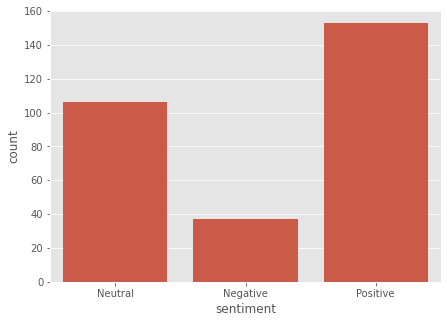

In [72]:
#Visualizing the Sentiment
fig = plt.figure(figsize=(7,5))
sns.countplot(x="sentiment",data=text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

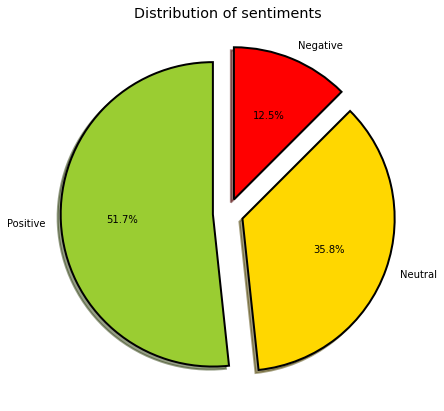

In [73]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [74]:
#Visulaizing Top 5 positive Sentiments
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Unnamed: 0,Num,Tweet,Label,polarity,sentiment
240,479,480,nationalpark transitioning renewables preserve...,NotMisinformation,0.850000,Positive
200,393,394,transitioning clean win environment economy gl...,NotMisinformation,0.511111,Positive
284,569,570,seedling many projects designed environmental ...,NotMisinformation,0.500000,Positive
59,112,113,solar abundant harnessed anywhere sun shines m...,NotMisinformation,0.487500,Positive
137,271,272,clean technology advancements already made sol...,NotMisinformation,0.433333,Positive


In [75]:
# text = ' '.join([word for word in pos_tweets[column_name]])
# plt.figure(figsize=(20,15), facecolor='None')
# wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Most frequent words in positive tweets', fontsize=19)
# plt.show()

In [76]:
#Visualizing Negative Words
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Unnamed: 0,Num,Tweet,Label,polarity,sentiment
281,563,564,lightbulb industries actually create jobs long...,NotMisinformation,-0.0125,Negative
192,380,381,reducing carbon footprint starts small changes...,NotMisinformation,-0.0375,Negative
122,242,243,sector offers diverse job opportunities engine...,NotMisinformation,-0.0500,Negative
172,336,337,solar power harnessed developing countries lea...,NotMisinformation,-0.0500,Negative
100,203,204,reducing food waste home supporting food rescu...,NotMisinformation,-0.0500,Negative


In [77]:
# text = ' '.join([word for word in neg_tweets['text']])
# plt.figure(figsize=(20,15), facecolor='None')
# wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Most frequent words in negative tweets', fontsize=19)
# plt.show()

In [78]:
#Visualizing Neutral Words
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Unnamed: 0,Num,Tweet,Label,polarity,sentiment
0,1,2,electric cars quieter reduce noise pollution u...,NotMisinformation,0.0,Neutral
202,400,401,decentralizes power empowering communities con...,NotMisinformation,0.0,Neutral
190,377,378,sources reduce risk water scarcity production ...,NotMisinformation,0.0,Neutral
184,359,360,transition renewables reduce environmental imp...,NotMisinformation,0.0,Neutral
180,353,354,electrification public transportation reduces ...,NotMisinformation,0.0,Neutral


In [79]:
# text = ' '.join([word for word in neutral_tweets['text']])
# plt.figure(figsize=(20,15), facecolor='None')
# wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Most frequent words in neutral tweets', fontsize=19)
# plt.show()

In [80]:
text_df

,Unnamed: 0,Num,Tweet,Label,polarity,sentiment
0,1,2,electric cars quieter reduce noise pollution u...,NotMisinformation,0.000000,Neutral
1,5,6,electric vehicles reduce reliance fossil fuels...,NotMisinformation,0.000000,Neutral
2,7,8,sustainable transportation options like electr...,NotMisinformation,0.000000,Neutral
3,8,9,wind power installations reduce electricity bi...,NotMisinformation,0.000000,Neutral
4,12,13,green sector fosters technological innovation ...,NotMisinformation,-0.100000,Negative
...,...,...,...,...,...,...
291,583,584,gear transition lead changes energyintensive i...,NotMisinformation,0.000000,Neutral
292,585,586,lightbulb technologies matured significantly a...,NotMisinformation,0.375000,Positive
293,587,588,highvoltage continuous advancements renewables...,NotMisinformation,0.093750,Positive
294,589,590,oildrum transition lead diverse mix reducing d...,NotMisinformation,-0.071429,Negative


## Adding sentiment as a feature to dataset

In [81]:
text_df[['Tweet', 'Label ', 'polarity', 'sentiment']].to_csv(file_path[:len(file_path)-4] + "_with_sentiment.csv",index=False)